# Лабораторная работа № 3 – Регрессионный анализ данных


## Выполнил: Кремлев Антон Алексеевич
## Учебная группа: 18ивт2
## 12 Вариант
## Набор данных: 3_air_quality
## Классификаторы:
### *1 – линейная регрессия без использования регуляризаторов;
### *2 – линейная регрессия, LASSO регуляризатор;



### Цель лабораторной работы – получение навыков работы с методами регрессии

### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

##### Data Set Information: The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 
##### Информация о наборе данных: набор данных содержит 9358 экземпляров ежечасно усредненных ответов от набора из 5 металлооксидных химических датчиков, встроенных в мультисенсорное устройство для определения качества воздуха. Устройство находилось на поле в сильно загрязненной зоне, на уровне дороги, в итальянском городе. Данные были записаны с марта 2004 года по февраль 2005 года (один год), представляющие самые длинные свободно доступные записи ответов полевых химических устройств для определения качества воздуха. Среднечасовые среднечасовые концентрации CO, неметановых углеводородов, бензола, общих оксидов азота (NOx) и диоксида азота (NO2) были получены с помощью совмещенного эталонного сертифицированного анализатора. 
 
###### Attribute Information: 
###### 0 Date (DD/MM/YYYY)   - Дата
###### 1 Time (HH.MM.SS)  - Время
###### 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)  - Истинная среднечасовая концентрация СО в мг / м ^ 3 (контрольный анализатор)
###### 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) - PT08.S1 (оксид олова) среднечасовая чувствительность датчика (номинально нацеленная на СО)
###### 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)  - Истинная среднечасовая концентрация неметановых углеводородов в микрог / м ^ 3 (эталонный анализатор)
###### 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)  - Истинная среднечасовая концентрация бензола в микрог / м ^ 3 (контрольный анализатор)
###### 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) - PT08.S2 (диоксид титана) среднечасовой отклик сенсора (номинально для NMHC)
###### 7 True hourly averaged NOx concentration in ppb (reference analyzer)  - Истинная среднечасовая концентрация NOx в миллионных долях (контрольный анализатор)
###### 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) - PT08.S3 (оксид вольфрама) среднечасовой отклик датчика (номинально на NOx)
###### 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) - Истинная среднечасовая концентрация NO2 в микрог / м ^ 3 (контрольный анализатор)
###### 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)  - PT08.S4 (оксид вольфрама) среднечасовой отклик датчика (номинально на NO2)
###### 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)   - PT08.S5 (оксид индия) среднечасовая чувствительность датчика (номинально O3)
###### 12 Temperature in Â°C  - Температура в ° С
###### 13 Relative Humidity (%) - Относительная влажность (%)
###### 14 AH Absolute Humidity - Абсолютная влажность


### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv("3_air_quality/AirQualityUCI.csv",sep=';' )
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314,-200,"13,5",1101,472,539,190,1374,1729,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163,-200,"11,4",1027,353,604,179,1264,1269,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142,-200,"12,4",1063,293,603,175,1241,1092,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003,-200,"9,5",961,235,702,156,1041,770,"28,3","13,5","0,5139"


In [76]:
len1 = len(df)
df.drop_duplicates(keep='first',inplace=True)
len2 = len(df)
#;; was deleted manualy, before reading df to correct opening
print("Всего удалено дубликатов" ,len1 - len2)


Всего удалено дубликатов 0


### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

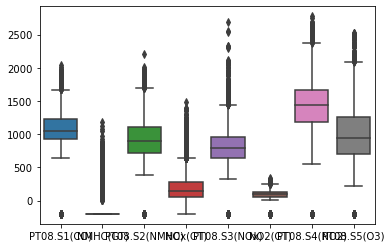

In [77]:
import seaborn as sns
df.head()
numerical = [c for c in df.columns if df[c].dtype.name != 'object']
sns.boxplot(data=df[numerical])

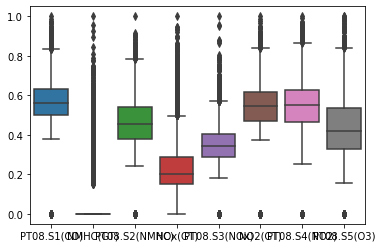

In [78]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical].values.astype(float))
sns.boxplot(data=df[numerical])

### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [79]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
for column in list(df):
    ### используем fit_transform, а не OneHotEncoder потому что у нас и так очень много параметров
    df[column] = pd.Series(label_encoder.fit_transform(df[column]))
### посмотрим результат 
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,114,18,33,666,136,39,623,163,700,108,986,977,66,375,1896
1,114,19,26,598,101,402,532,100,818,87,853,681,63,363,1727
2,114,20,29,708,78,398,516,128,784,109,849,783,49,426,1853
3,114,21,29,682,70,400,525,169,736,117,878,912,40,486,2056
4,114,22,18,578,41,372,413,128,848,111,784,819,42,482,2066


### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

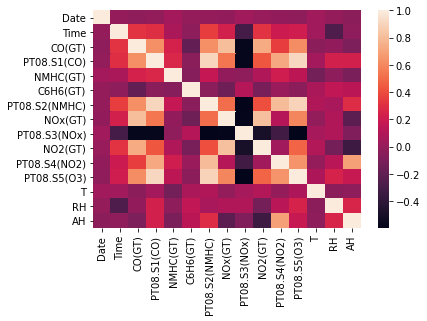

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sns.heatmap(df.corr())

### 6.	Заполните пропущенные значения в данных;

In [81]:
df.count()

Date             9357
Time             9357
CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

##### нет пропусков

### 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

#### Классификаторы:
#### *1 – линейная регрессия без использования регуляризаторов;
#### *2 – линейная регрессия, LASSO регуляризатор;

In [85]:
###
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from  sklearn import linear_model
from sklearn.svm import LinearSVC
###
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
###
df.columns


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [84]:
X_data, Y_data = df.drop(columns="CO(GT)", axis=1).values, df["CO(GT)"].values
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=.3)

### *1 – линейная регрессия без использования регуляризаторов

In [98]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)


In [101]:
from scipy.stats import pearsonr, spearmanr
P, p_value_P = pearsonr(pred_reg, y_test)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(pred_reg, y_test)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)

Pearson correlation:  0.895816919582646
Spearmen correlation:  0.8684295235341171
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


### *2 – линейная регрессия, LASSO регуляризатор;

In [121]:
from sklearn.linear_model import Lasso

In [118]:
params = {'alpha': np.arange(0.2, 0.5, 0.01)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(X_train, y_train)
best_alpha = lasso_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.24000000000000005


In [119]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train,y_train)
pred_reg = lasso.predict(X_test)

In [123]:
P, p_value_P = pearsonr(pred_reg, y_test)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(pred_reg, y_test)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)


Pearson correlation:  0.8958101412154589
Spearmen correlation:  0.868439407731306
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0
